Chapter 12

# 数据矩阵分析
《线性代数》 | 鸢尾花书：数学不难

这段代码完整地展示了从**原始数据读取、预处理、中心化、标准化到协方差矩阵与相关系数矩阵的构建与可视化**的全过程，涉及了多个线性代数核心概念。下面从数学角度详细分段解析：

---

$1.$ **数据矩阵构建与可视化**

代码首先加载鸢尾花数据集的前四列，构成一个 $n \times 4$ 的数据矩阵 $X$，其中 $n = 150$，每行代表一朵花，每列分别表示萼片长度、萼片宽度、花瓣长度、花瓣宽度，单位均为厘米。

$$
X = \begin{bmatrix}
x_{11} & x_{12} & x_{13} & x_{14} \\
x_{21} & x_{22} & x_{23} & x_{24} \\
\vdots & \vdots & \vdots & \vdots \\
x_{n1} & x_{n2} & x_{n3} & x_{n4}
\end{bmatrix}
$$

通过 `heatmap` 和 `pairplot`，直观展现了数据的整体分布和特征间的成对关系。

---

$2.$ **均值计算与质心绘制**

定义均值向量（质心）$\mu$：

$$
\mu = \frac{1}{n} \sum_{i=1}^n x_i = \frac{1}{n} \mathbf{1}^T X
$$

其中 $\mathbf{1}$ 是 $n \times 1$ 的全 1 列向量。均值作为质心，用红色叉号标记在每个特征二维投影的散点图中。

---

$3.$ **中心化操作（去除均值）**

对原始数据中心化，得到 $X_{\text{demean}}$：

$$
X_{\text{demean}} = X - \mathbf{1} \mu
$$

中心化后，所有特征的均值为 0，即：

$$
\frac{1}{n} \sum_{i=1}^n (x_i - \mu) = 0
$$

这一步是后续协方差计算和PCA分析的基础。

---

$4.$ **协方差矩阵计算**

协方差矩阵 $\Sigma$ 是中心化矩阵与自身的归一化乘积：

$$
\Sigma = \frac{1}{n - 1} X_{\text{demean}}^T X_{\text{demean}}
$$

$\Sigma$ 是一个 $4 \times 4$ 对称矩阵，其第 $i, j$ 项表示第 $i$ 个特征与第 $j$ 个特征之间的协方差，单位是 $\text{cm}^2$。

---

$5.$ **方差与标准差**

方差为协方差矩阵的对角元素：

$$
\text{Var}(x_i) = \Sigma_{ii}
$$

标准差为其平方根：

$$
\text{Std}(x_i) = \sqrt{\Sigma_{ii}}
$$

再将标准差构成对角矩阵 $D$：

$$
D = \text{diag}(\text{Std}(x_1), \dots, \text{Std}(x_4))
$$

---

$6.$ **标准化处理**

将中心化矩阵右乘标准差矩阵的逆，得到标准化矩阵 $Z$：

$$
Z = X_{\text{demean}} D^{-1}
$$

标准化后，每一列特征的均值为0，标准差为1，得到无单位（unitless）特征数据，便于比较不同量纲的特征。

---

$7.$ **标准化后协方差矩阵**

标准化后的协方差矩阵变成相关性矩阵：

$$
Z^T Z / (n - 1) = P
$$

每个元素 $P_{ij}$ 表示标准化后的第 $i$ 与第 $j$ 特征之间的皮尔逊相关系数，取值范围为 $[-1, 1]$，是对协方差的归一化。

---

$8.$ **相关性矩阵与可视化**

最后通过 `X_df.corr()` 直接计算相关性矩阵 $P$，该矩阵等价于标准化数据的协方差矩阵，即：

$$
P = \frac{\text{Cov}(x_i, x_j)}{\text{Std}(x_i)\text{Std}(x_j)}
$$

相关系数矩阵通过热图展示，便于观察特征之间的线性强相关性或负相关性。

---

总结来说，这段代码是线性代数中围绕数据矩阵 $X$ 进行的一系列变换与分析操作：均值（质心）计算、中心化、协方差构建、标准差矩阵、标准化处理与相关性评估，构成主成分分析（PCA）等技术的数学基础。

## 初始化

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 导入鸢尾花数据集

In [5]:
X_df_iris = pd.read_pickle('X_df_iris.pkl')

In [6]:
X_df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
X_df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
X_df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 处理数据

In [10]:
# 只取前四特征列，忽略标签列
X_df = X_df_iris.iloc[:,:4]

# 修改列名称
X_df.columns = ['Sepal length (cm)', 
                'Sepal width (cm)', 
                'Petal length (cm)', 
                'Petal width (cm)']

In [11]:
X_df.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 可视化

<Axes: >

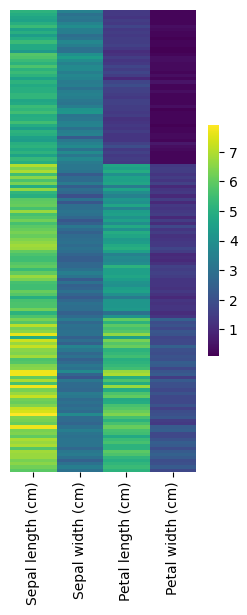

In [13]:
fig, ax = plt.subplots(figsize = (3,6))
sns.heatmap(X_df.iloc[:,0:4], ax = ax, 
            # vmin = 0.2, vmax = -0.2,
            yticklabels = [],
            annot=False,
            cmap = 'viridis', 
            square = False,
            cbar_kws={'shrink': 0.5})

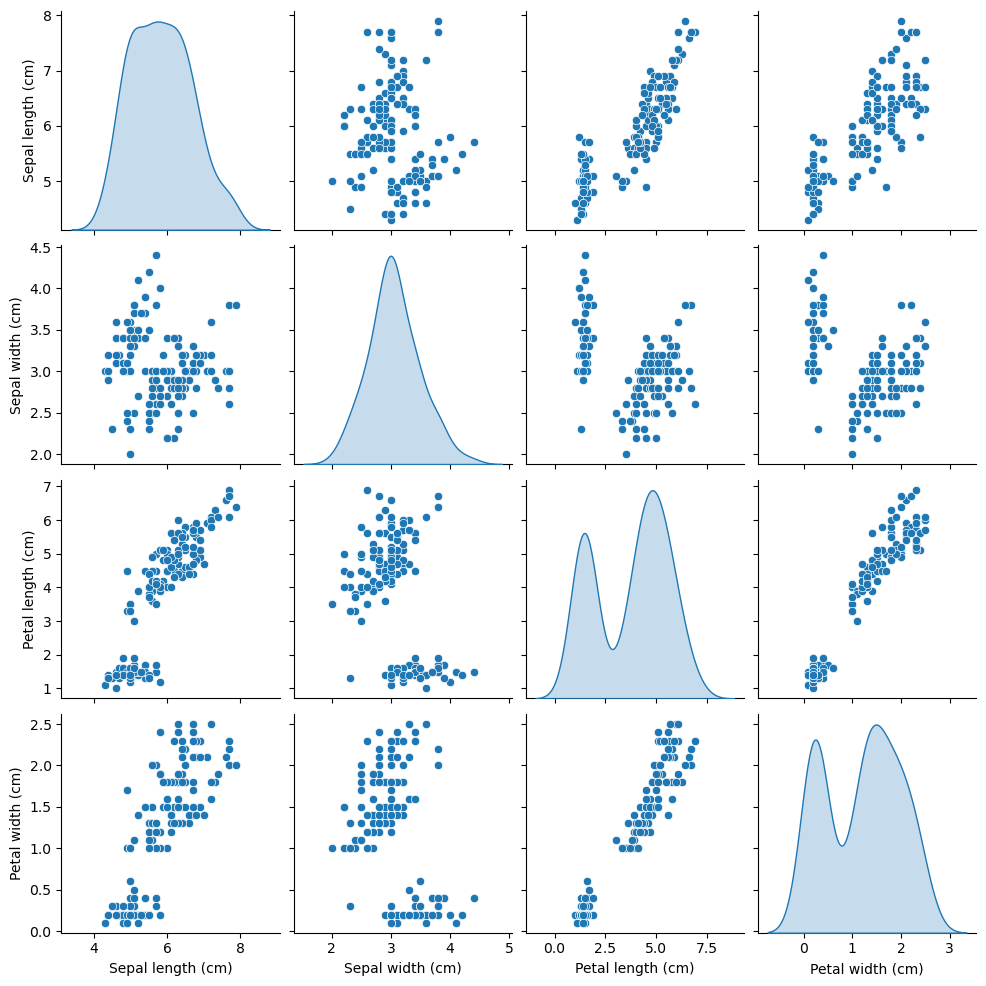

In [14]:
# 成对特征散点图
sns.pairplot(X_df, diag_kind = 'kde')

## 均值

In [16]:
mean_X = X_df.mean()
mean_X

Sepal length (cm)    5.843333
Sepal width (cm)     3.057333
Petal length (cm)    3.758000
Petal width (cm)     1.199333
dtype: float64

In [17]:
n = len(X_df)
all_ones_n = np.ones((n,1)) 

In [18]:
all_ones_n.T @ X_df

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
0,876.5,458.6,563.7,179.9


In [19]:
all_ones_n.T @ X_df/n

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
0,5.843333,3.057333,3.758,1.199333


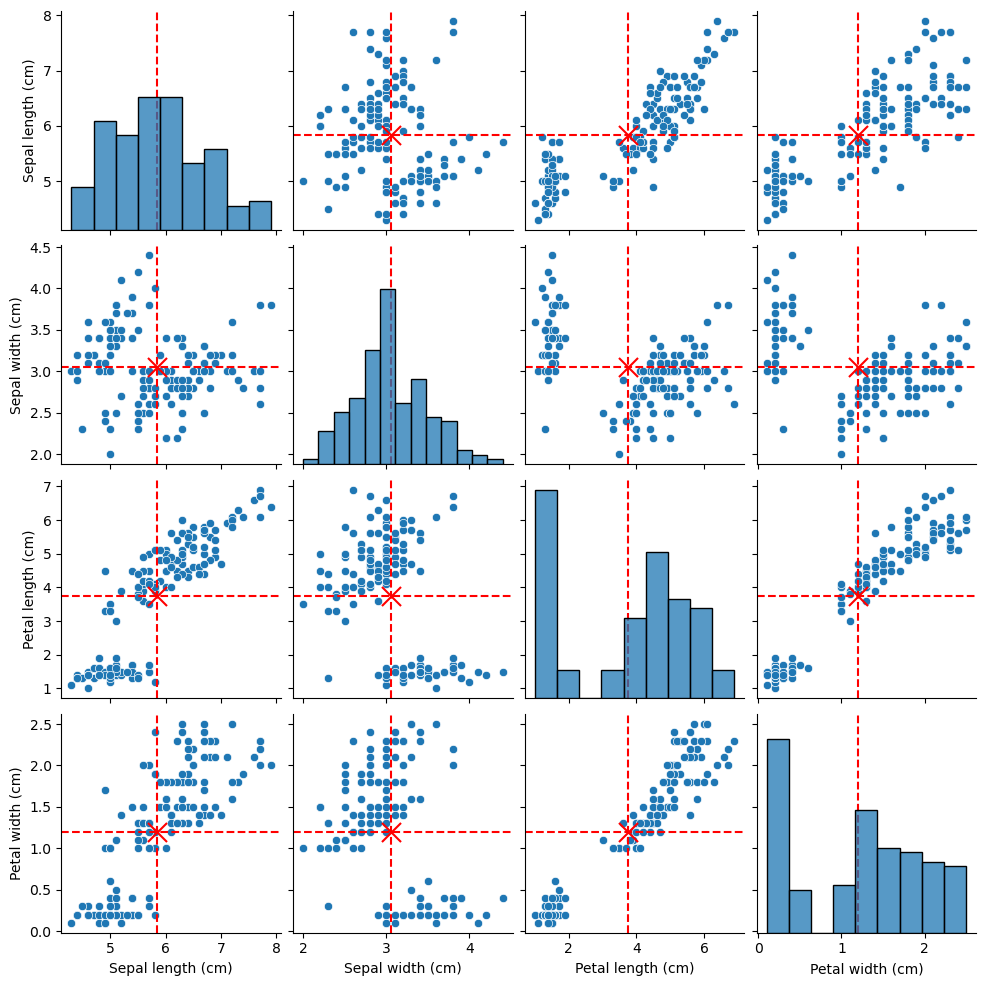

In [20]:
# 成对特征散点图
g = sns.pairplot(X_df)

# 在每个子图上画上质心
for i in range(len(g.axes)):         # 遍历行
    for j in range(len(g.axes)):     # 遍历列
        if i != j:  # 只在非对角线图上添加（对角线是分布图）
            ax = g.axes[i, j]
            ax.scatter(mean_X.iloc[j], mean_X.iloc[i], 
                       color='red', marker='x', s=188, zorder=5)
            ax.axhline(y = mean_X.iloc[i], c = 'r', ls = '--')
            ax.axvline(x = mean_X.iloc[j], c = 'r', ls = '--')

        else:
            ax = g.axes[i, j]
            ax.axvline(x = mean_X.iloc[j], c = 'r', ls = '--')

## 中心化

In [22]:
X_df_demean = X_df - X_df.mean()
X_df_demean.columns = ['Sepal length, demean (cm)', 
                       'Sepal width, demean (cm)', 
                       'Petal length, demean (cm)', 
                       'Petal width, demean (cm)']

In [23]:
mean_X_demean = X_df_demean.mean()
mean_X_demean

Sepal length, demean (cm)   -3.315866e-16
Sepal width, demean (cm)    -3.552714e-16
Petal length, demean (cm)   -6.631732e-16
Petal width, demean (cm)    -2.368476e-16
dtype: float64

<Axes: >

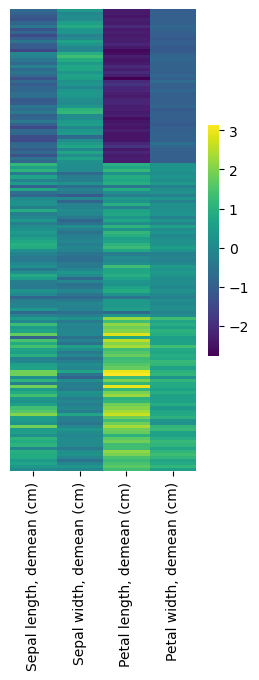

In [24]:
fig, ax = plt.subplots(figsize = (3,6))
sns.heatmap(X_df_demean, ax = ax, 
            yticklabels = [],
            annot=False,
            cmap = 'viridis', 
            square = False,
            cbar_kws={'shrink': 0.5})

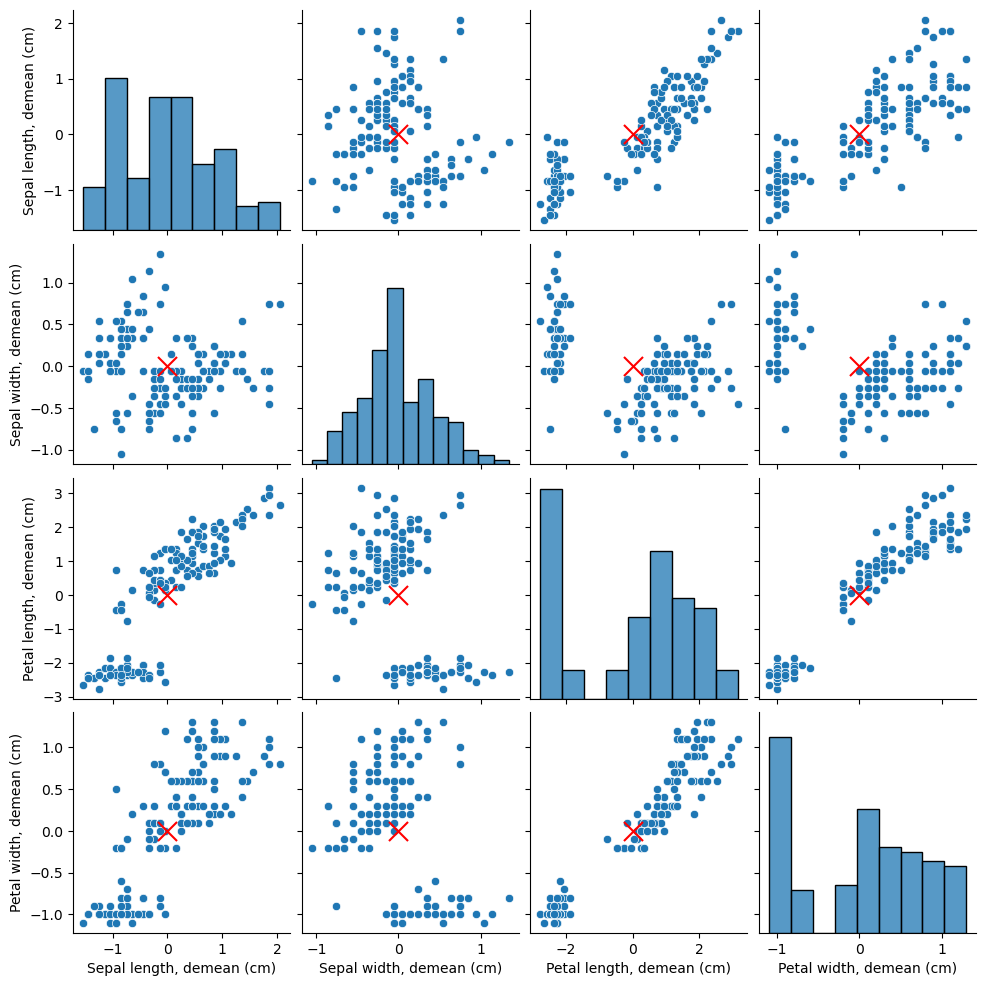

In [25]:
# 成对特征散点图`
g = sns.pairplot(X_df_demean)

# 在每个子图上画上质心
for i in range(len(g.axes)):         # 遍历行
    for j in range(len(g.axes)):     # 遍历列
        if i != j:  # 只在非对角线图上添加（对角线是分布图）
            ax = g.axes[i, j]
            ax.scatter(mean_X_demean.iloc[j], mean_X_demean.iloc[i], 
                       color='red', marker='x', s=188, zorder=5)

## 协方差矩阵

In [27]:
Sigma = X_df.cov()
Sigma.columns = Sigma.columns.str.replace(' (cm)', '', regex=False)
Sigma.index = Sigma.index.str.replace(' (cm)', '', regex=False)
Sigma

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,0.685694,-0.042434,1.274315,0.516271
Sepal width,-0.042434,0.189979,-0.329656,-0.121639
Petal length,1.274315,-0.329656,3.116278,1.295609
Petal width,0.516271,-0.121639,1.295609,0.581006


In [28]:
Sigma

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,0.685694,-0.042434,1.274315,0.516271
Sepal width,-0.042434,0.189979,-0.329656,-0.121639
Petal length,1.274315,-0.329656,3.116278,1.295609
Petal width,0.516271,-0.121639,1.295609,0.581006


In [29]:
X_df_demean.T @ X_df_demean/(n-1)

,"Sepal length, demean (cm)","Sepal width, demean (cm)","Petal length, demean (cm)","Petal width, demean (cm)"
"Sepal length, demean (cm)",0.685694,-0.042434,1.274315,0.516271
"Sepal width, demean (cm)",-0.042434,0.189979,-0.329656,-0.121639
"Petal length, demean (cm)",1.274315,-0.329656,3.116278,1.295609
"Petal width, demean (cm)",0.516271,-0.121639,1.295609,0.581006


<Axes: >

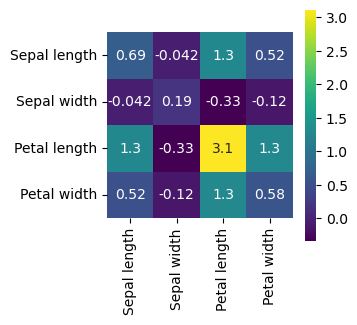

In [30]:
fig, ax = plt.subplots(figsize = (3,3))
sns.heatmap(Sigma, ax = ax, 
            annot=True,
            cmap = 'viridis', 
            square = True)
# 数值的单位是 cm**2

## 方差、标准差

In [32]:
variance = np.diag(Sigma)
variance

array([0.68569351, 0.18997942, 3.11627785, 0.58100626])

In [33]:
std = np.sqrt(variance)
std

array([0.82806613, 0.43586628, 1.76529823, 0.76223767])

## 标准化

In [35]:
D = np.diag(std)
D

array([[0.82806613, 0.        , 0.        , 0.        ],
       [0.        , 0.43586628, 0.        , 0.        ],
       [0.        , 0.        , 1.76529823, 0.        ],
       [0.        , 0.        , 0.        , 0.76223767]])

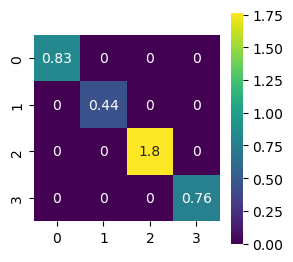

In [36]:
fig, ax = plt.subplots(figsize = (3,3))
sns.heatmap(D, ax = ax, 
            annot=True,
            cmap = 'viridis', 
            square = True)
# 数值的单位是 cm**2

In [37]:
Z_df = (X_df - X_df.mean()) @ np.linalg.inv(D)
Z_df.columns = ['Sepal length, standardized', 
                'Sepal width, standardized', 
                'Petal length, standardized', 
                'Petal width, standardized']

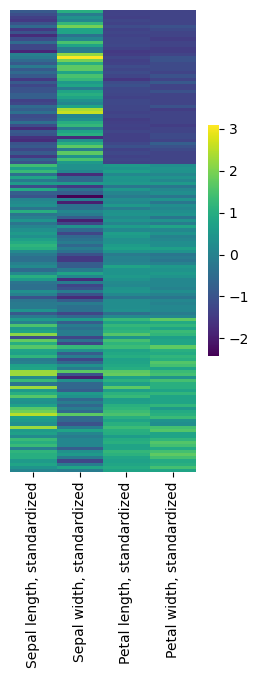

In [83]:
fig, ax = plt.subplots(figsize = (3,6))
sns.heatmap(Z_df, ax = ax, 
            yticklabels = [],
            annot=False,
            cmap = 'viridis', 
            square = False,
            cbar_kws={'shrink': 0.5})

In [39]:
Z_df.head()

,"Sepal length, standardized","Sepal width, standardized","Petal length, standardized","Petal width, standardized"
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [40]:
mean_Z = Z_df.mean()
mean_Z

Sepal length, standardized   -1.068960e-15
Sepal width, standardized    -3.214096e-16
Petal length, standardized   -2.375877e-16
Petal width, standardized    -2.390680e-16
dtype: float64

In [41]:
Z_df.cov()

,"Sepal length, standardized","Sepal width, standardized","Petal length, standardized","Petal width, standardized"
"Sepal length, standardized",1.000000,-0.117570,0.871754,0.817941
"Sepal width, standardized",-0.117570,1.000000,-0.428440,-0.366126
"Petal length, standardized",0.871754,-0.428440,1.000000,0.962865
"Petal width, standardized",0.817941,-0.366126,0.962865,1.000000


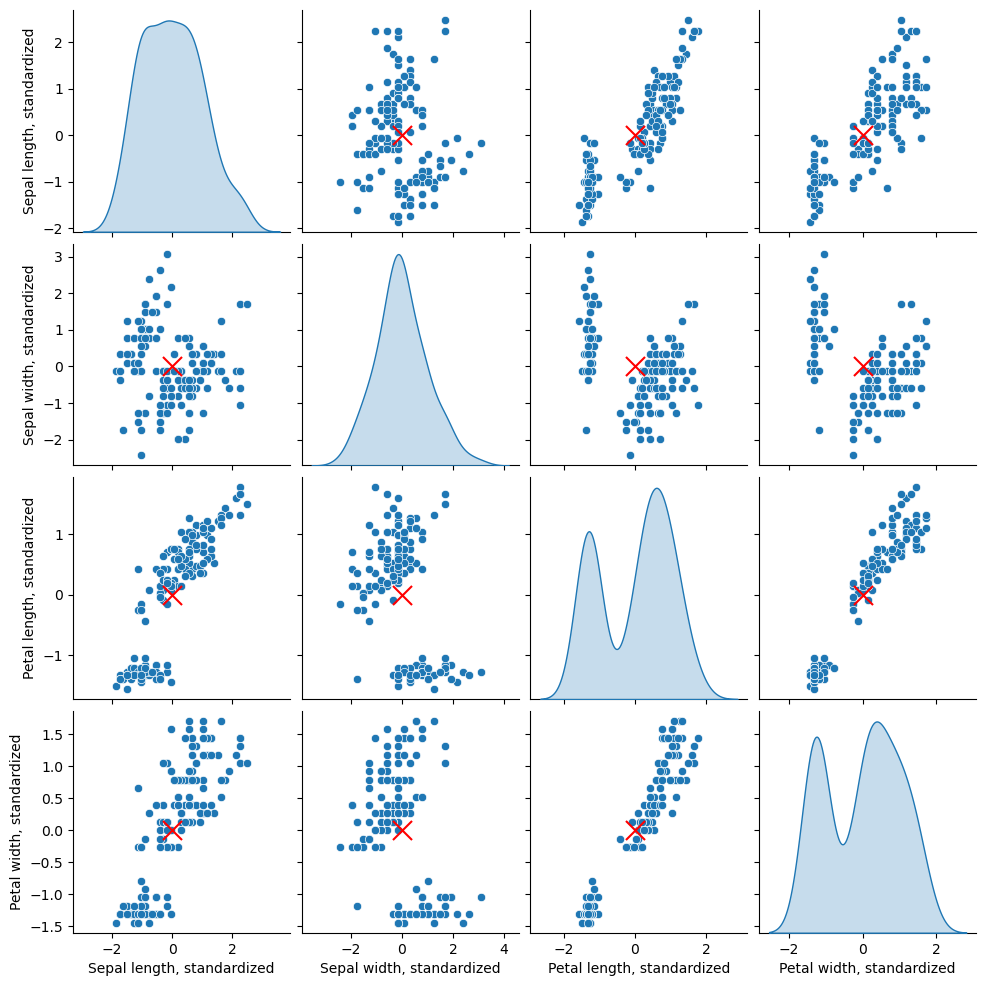

In [42]:
# 成对特征散点图
g = sns.pairplot(Z_df, diag_kind = 'kde')

# 在每个子图上画上质心
for i in range(len(g.axes)):         # 遍历行
    for j in range(len(g.axes)):     # 遍历列
        if i != j:  # 只在非对角线图上添加（对角线是分布图）
            ax = g.axes[i, j]
            ax.scatter(mean_Z.iloc[j], mean_Z.iloc[i], 
                       color='red', marker='x', s=188, zorder=5)

## 线性相关性系数矩阵

In [44]:
P = X_df.corr()
P.columns = P.columns.str.replace(' (cm)', '', regex=False)
P.index = P.index.str.replace(' (cm)', '', regex=False)
P

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.117570,0.871754,0.817941
Sepal width,-0.117570,1.000000,-0.428440,-0.366126
Petal length,0.871754,-0.428440,1.000000,0.962865
Petal width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

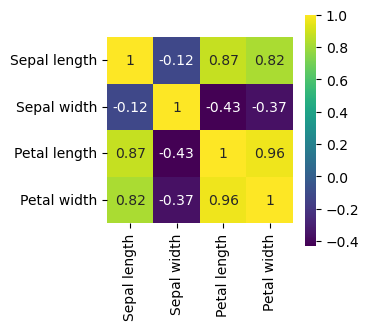

In [45]:
fig, ax = plt.subplots(figsize = (3,3))
sns.heatmap(P, ax = ax, 
            annot=True,
            cmap = 'viridis', 
            square = True)

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  